In [87]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df=pd.read_csv('final.csv')
def xy(r):
    d=[]
    global a,b
    for i in range(1,r+1):
        if(r%i==0):
            d.append(i)
    if len(d)%2==0:
        a=d[int(len(d)/2-1)]
        b=d[int(len(d)/2)]
    df=pd.DataFrame(index=list(np.arange(r)),columns={'Yrows','Xcols'})
    j,k=0,0
    while(k<=b-1):
        for i in range(b):
            df['Yrows'][j]=k
            df['Xcols'][j]=i
            j=j+1
        k=k+1
    return(df)
df=df.join(xy(len(df)))
df.drop(['Unnamed: 0','lastPrice', 'totalBuyQuantity','totalSellQuantity','Time'],axis=1,inplace=True)
symbol=(np.asarray(df['symbol'])).reshape(a,b)
Times=(np.asarray(df['Times'])).reshape(a,b)
result=df.pivot(index='Yrows',columns='Xcols',values='Times')
labels=(np.asarray(["{0} \n {1:.7f}".format(symb,times) for symb,times in zip(symbol.flatten(),Times.flatten())])).reshape(a,b)

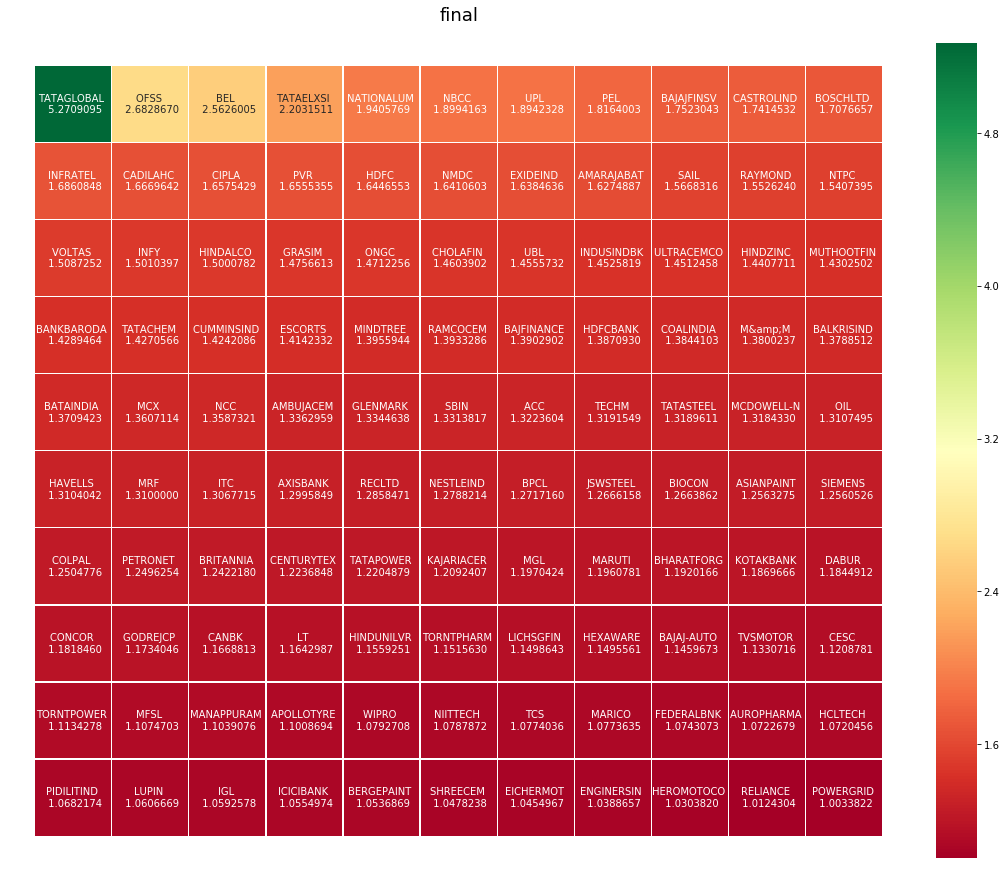

In [88]:
fig,ax=plt.subplots(figsize=([19,15]))


#Set the font size and the distance of the title from the plot
plt.title('final',fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])


ax.set_xticks([])
ax.set_yticks([])

#remove the axis
ax.axis('off')
#Use the heatmap function from the seaborn package

sn.heatmap(result,annot=labels,fmt="",annot_kws={"size": 10},cmap="RdYlGn",linewidth=0.30,square=True,ax=ax)

#display final
plt.show()